# TM Final project:

## Title:

Name:Omid Lavakhamseh

LIU-ID: omila405


#### import needed libraries: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,fbeta_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Reading the data :

In [2]:
email=pd.read_csv('spam_assassin.csv')#completeSpamAssassin.csv
#email=pd.read_csv('completeSpamAssassin.csv')processed_data.csv
#email=pd.read_csv('processed_data.csv')
email



,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0
...,...,...
5791,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5792,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5793,Received: from hq.pro-ns.net (localhost [127.0...,1
5794,From razor-users-admin@lists.sourceforge.net T...,0


In [137]:

#plt.savefig('M:/LIU/TM/project/Final Work/original_data_table.png')
#fig.savefig('table.png', bbox_inches='tight', pad_inches=0.5)

In [3]:
email.rename(columns = {'text':'body'}, inplace = True)
email.rename(columns = {'target':'label'}, inplace = True)

In [4]:
email.head()

,body,label
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [5]:
print(email.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    5796 non-null   object
 1   label   5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB
None


#### Preprocessing:


<AxesSubplot:xlabel='label', ylabel='count'>

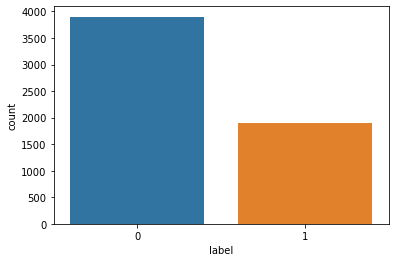

In [6]:
sns.countplot(email['label'])
#plt.savefig('M:/LIU/TM/project/Final Work/test_graph.png')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/sotun.jpg', dpi=300, bbox_inches='tight')


In [7]:
print('number of one labels',sum(email['label']==1))
print('number of zero labels',sum(email['label']==0))

number of one labels 1896
number of zero labels 3900


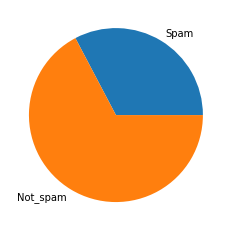

In [8]:
lab=['Spam','Not_spam']
count=[sum(email['label']==1),sum(email['label']==0)]
plt.pie(count,labels=lab)
#fig = ax.get_figure()
#fig.set_size_inches(8, 8)
plt.show()
#plt.savefig(, bbox_inches='tight')
#plt.savefig('M:/LIU/TM/project/Final Work/gerd3.jpg', dpi=300, bbox_inches='tight')


##### A)there is not any missing value 

In [9]:
print(email.isnull().sum())

body     0
label    0
dtype: int64


##### B)
Now we need to check if all charachters are lower or not because for example 'YES' and 'yes' both refer to the same concept but my model would consider them different.

In [10]:
print('Are all letters lower case in body column?',str(email['body']).islower())



Are all letters lower case in body column? False


AS we see we have a combination of lower and upper case in subject and email columns so we need to change them to the same format because of the reason that mentioned above.  

In [16]:
email.groupby('label').describe()

body                                                               
      count unique                                                top freq
label                                                                     
0      3900   3638  From fork-admin@xent.com Sat Sep 7 21:54:10 20...    5
1      1896   1691  Return-Path: ler@lerami.lerctr.org Delivery-Da...    6

In [17]:
email['length'] = email['body'].apply(len)

email.head(6)

,body,label,length
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060
5,From tobaccodemon@terra.es Sat Sep 7 22:05:58 ...,1,2017


<AxesSubplot:xlabel='message length'>

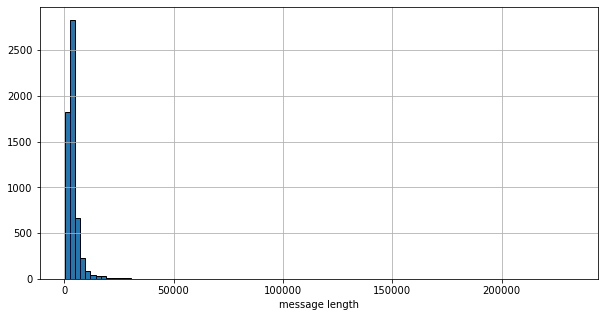

In [158]:

plt.xlabel('message length')
email['length'].hist(bins=100, edgecolor='black', figsize=(10,5))
#plt.savefig('output/Histogram1.png')

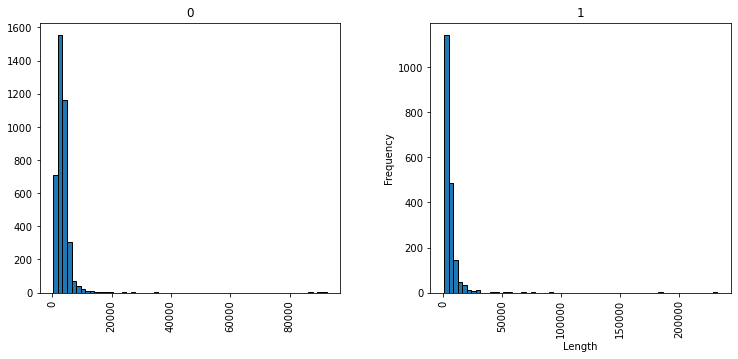

In [133]:
import matplotlib.pyplot as plt

# Your existing histogram generation
email.hist(column='length',by='label',bins=60,figsize=(12,5), edgecolor='black')

# Add labels
plt.xlabel('Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()


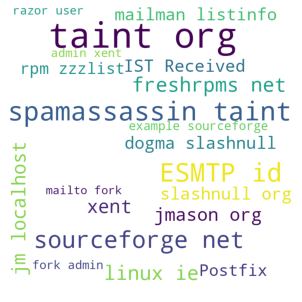

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#text = "This is an example sentence to demonstrate stopword removal."
#stop_words = set(stopwords.words('english'))

#tokens = word_tokenize(text)
#filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

#filtered_text = ' '.join(filtered_tokens)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10,max_words=20).generate(filtered_not_spam)

plt.figure(figsize = (100, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.savefig('M:/LIU/TM/project/Final Work/frequent_notspam.png', dpi=300, bbox_inches='tight')
#plt.show() 


In [38]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



#tokens = word_tokenize(text)
filtered_spam = [word for word in email[email['label'] == 1]['body'] if word.upper() not in stop_words]

filtered_spam = ' '.join(filtered_spam)
#print(filtered_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omidl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
len(filtered_spam)

10746791

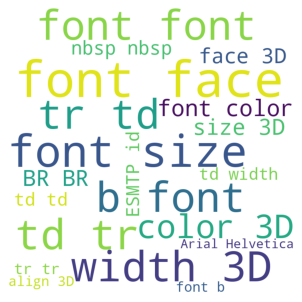

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10,max_words=20).generate(filtered_spam)

plt.figure(figsize = (100, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.savefig('M:/LIU/TM/project/Final Work/frequent_spam.png', dpi=300, bbox_inches='tight')
#plt.show() 


DATA preparation

In [11]:
from sklearn.model_selection import train_test_split
random.seed(1234)
X = email['body']  # the features we want to analyze
Y = email['label']  # the labels, or answers, we want to test against

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.25)

In [12]:
print("X_train:",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)
print("X_val: ",X_val.shape)
print("Y_val:",Y_val.shape)
print('proportion of train {:.2f} '.format(len(Y_train)/email.shape[0]))
print('proportion of validation {:.2f}'.format(len(Y_val)/email.shape[0]))
print('proportion of test {:.2f} ' .format(len(Y_test)/email.shape[0]))

(3477, 2)
(1159, 2)
(1160, 2)


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to uppercase
    text = text.upper()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return tokens

# Apply the preprocessing to the training data
X_train_token = X_train.apply(preprocess_text)


In [9]:
X_train_token

667     [FROM, WED, AUG, ZZZZ, RECEIVED, FROM, LOCALHO...
4326    [FROM, RSSFEEDS, MON, SEP, RSSFEEDS, YYYY, REC...
4434    [FROM, TUE, AUG, YYYY, RECEIVED, FROM, LOCALHO...
2715    [FROM, PUDGE, SAT, SEP, PUDGE, YYYY, RECEIVED,...
52      [FROM, MON, JUN, MON, MAY, RECEIVED, FROM, BY,...
                              ...                        
2874    [FROM, MIKEJ, MON, SEP, MIKEJ, ZZZZ, RECEIVED,...
3294    [FROM, THU, JUL, YYYY, RECEIVED, FROM, LOCALHO...
4019    [FROM, JANI, TUE, AUG, JANI, ZZZZ, RECEIVED, F...
530     [FROM, THU, SEP, YYYY, RECEIVED, FROM, LOCALHO...
4342    [FROM, FRI, OCT, YYYY, RECEIVED, FROM, LOCALHO...
Name: body, Length: 3477, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Detokenize
X_train_join = X_train_token.apply(lambda x: ' '.join(x))
X_train_join # for analysis the sentence

667     FROM WED AUG ZZZZ RECEIVED FROM LOCALHOST LOCA...
4326    FROM RSSFEEDS MON SEP RSSFEEDS YYYY RECEIVED F...
4434    FROM TUE AUG YYYY RECEIVED FROM LOCALHOST LOCA...
2715    FROM PUDGE SAT SEP PUDGE YYYY RECEIVED FROM LO...
52      FROM MON JUN MON MAY RECEIVED FROM BY WITH SMT...
                              ...                        
2874    FROM MIKEJ MON SEP MIKEJ ZZZZ RECEIVED FROM LO...
3294    FROM THU JUL YYYY RECEIVED FROM LOCALHOST LOCA...
4019    FROM JANI TUE AUG JANI ZZZZ RECEIVED FROM LOCA...
530     FROM THU SEP YYYY RECEIVED FROM LOCALHOST JALA...
4342    FROM FRI OCT YYYY RECEIVED FROM LOCALHOST JALA...
Name: body, Length: 3477, dtype: object

In [11]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_join)
X_train_tfidf

<3477x31459 sparse matrix of type '<class 'numpy.float64'>'
	with 510304 stored elements in Compressed Sparse Row format>

In [12]:
X_valid_token = X_val.apply(preprocess_text)
X_valid_token

486     [FROM, TUE, SEP, YYYY, RECEIVED, FROM, LOCALHO...
3777    [FROM, THU, SEP, ZZZZ, RECEIVED, FROM, LOCALHO...
3313    [FROM, MON, SEP, YYYY, RECEIVED, FROM, LOCALHO...
5185    [FROM, MON, JUN, TUE, JUN, RECEIVED, FROM, BY,...
181     [FROM, RSSFEEDS, MON, OCT, RSSFEEDS, YYYY, REC...
                              ...                        
2307    [FROM, MON, JUL, YYYY, RECEIVED, FROM, BY, POS...
3221    [FROM, MON, JUN, SAT, MAY, RECEIVED, FROM, BY,...
339     [FROM, MON, JUN, DIRECTOR, MON, MAR, RECEIVED,...
2859    [FROM, MON, JUL, YYYY, RECEIVED, FROM, LOCALHO...
3952    [FROM, WED, AUG, YYYY, RECEIVED, FROM, LOCALHO...
Name: body, Length: 1159, dtype: object

In [13]:
X_valid_join = X_valid_token.apply(lambda x: ' '.join(x))
X_valid_join

486     FROM TUE SEP YYYY RECEIVED FROM LOCALHOST JALA...
3777    FROM THU SEP ZZZZ RECEIVED FROM LOCALHOST JALA...
3313    FROM MON SEP YYYY RECEIVED FROM LOCALHOST JALA...
5185    FROM MON JUN TUE JUN RECEIVED FROM BY WITH ESM...
181     FROM RSSFEEDS MON OCT RSSFEEDS YYYY RECEIVED F...
                              ...                        
2307    FROM MON JUL YYYY RECEIVED FROM BY POSTFIX WIT...
3221    FROM MON JUN SAT MAY RECEIVED FROM BY WITH ESM...
339     FROM MON JUN DIRECTOR MON MAR RECEIVED FROM BY...
2859    FROM MON JUL YYYY RECEIVED FROM LOCALHOST LOCA...
3952    FROM WED AUG YYYY RECEIVED FROM LOCALHOST LOCA...
Name: body, Length: 1159, dtype: object

In [14]:

X_valid_tfidf = vectorizer.transform(X_valid_join) #using the same vectorizer as train
X_valid_tfidf

<1159x31459 sparse matrix of type '<class 'numpy.float64'>'
	with 162774 stored elements in Compressed Sparse Row format>

In [15]:
X_test_token = X_test.apply(preprocess_text)
X_test_join = X_test_token.apply(lambda x: ' '.join(x))
X_test_tfidf = vectorizer.transform(X_test_join)
X_test_tfidf

<1160x31459 sparse matrix of type '<class 'numpy.float64'>'
	with 159684 stored elements in Compressed Sparse Row format>

# 4.Modeling:

In [76]:
## 4.1 SVC

In [73]:
# Model training
random.seed(1234)
model = SVC(kernel="linear",random_state=42)
model.fit(X_train_tfidf, Y_train)

# Model evaluation
Y_pred_tr = model.predict(X_train_tfidf)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
# performance on unseen data

# Model evaluation
Y_pred_val = model.predict(X_valid_tfidf)
print("valid Accuracy:", accuracy_score(Y_val, Y_pred_val))
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred_val))
print("Precision:", precision_score(Y_val, Y_pred_val))
print("Recall:", recall_score(Y_val, Y_pred_val))
print("F1 score:", f1_score(Y_val, Y_pred_val))

train Accuracy: 0.998561978717285
valid Accuracy: 0.9896462467644521
train Accuracy: 0.998561978717285
Accuracy: 0.9896462467644521
Precision: 0.9972677595628415
Recall: 0.9707446808510638
F1 score: 0.9838274932614556


In [74]:
from sklearn.metrics import confusion_matrix 

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred_val)

# print the confusion matrix
print(cm)

[[782   1]
 [ 11 365]]


Text(50.722222222222214, 0.5, 'True Labels')

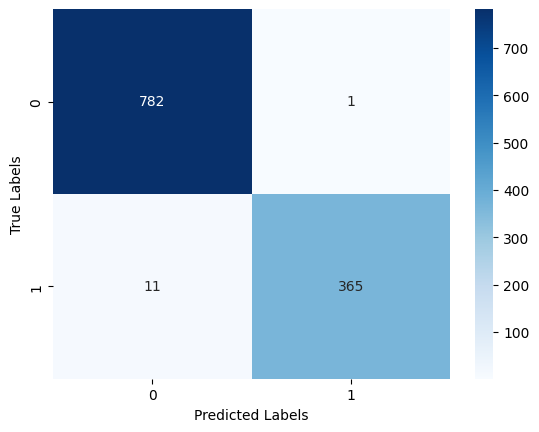

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/Really akharin report/CM_SVC2.jpg', dpi=300, bbox_inches='tight')


In [23]:


# Round predictions to the nearest integer (0 or 1) to get the predicted labels
#predicted_labels = np.round(Y_pred).astype(int)

# Identify the instances where the model's prediction was incorrect
incorrect = X_valid_join[Y_pred_val != np.array(Y_val)]

# Now you can examine the `incorrect` DataFrame to see the instances where the model was incorrect
print(incorrect)

5468    RECEIVED FROM BY LOCALHOST WITH FOR K LOCALHOS...
3233    FROM FRI AUG YYYY RECEIVED FROM LOCALHOST LOCA...
3799    FROM POWERBALLINFO THU SEP POWERBALLINFO ZZZZ ...
5767    FROM THU AUG YYYY RECEIVED FROM LOCALHOST LOCA...
4623    FROM WED JUL YYYY RECEIVED FROM LOCALHOST LOCA...
4958    FROM THU AUG YYYY RECEIVED FROM LOCALHOST LOCA...
4221    FROM HTTPD FRI AUG HTTPD YYYY RECEIVED FROM LO...
448     FROM THU AUG ZZZZ RECEIVED FROM LOCALHOST LOCA...
854     RECEIVED FROM LOCALHOST BY WITH ESMTP ID FOR T...
1513    FROM FRI JUL YYYY RECEIVED FROM LOCALHOST LOCA...
667     FROM WED AUG ZZZZ RECEIVED FROM LOCALHOST LOCA...
519     FROM TUE AUG YYYY RECEIVED FROM LOCALHOST LOCA...
Name: body, dtype: object


In [34]:
pd.set_option('display.max_colwidth', None)


In [25]:
incorrect


5468                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [26]:
pd.reset_option('display.max_colwidth')

### Hyper parameter tunning

In [75]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

random.seed(1234)

# Split data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a pipeline combining a text feature extractor with a simple classifier
'''pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', svm.SVC(kernel='linear',random_state=42)),
])'''


pipeline = Pipeline([
    ('clf', svm.SVC(kernel='linear')),
])



# Define parameter range for grid search
parameters = {'clf__C': [0.1, 1, 10, 100]}

# Grid search across our parameters, scoring by accuracy
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, Y_train)

# Best parameter set
print('Best parameters found:\n', grid_search.best_params_)

# All results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predict using best parameters on test set
y_pred_val_opt = grid_search.predict(X_valid_tfidf)

# Evaluate model
print(classification_report(Y_val, y_pred_val_opt))
print("Accuracy: ", accuracy_score(Y_val, y_pred_val_opt))


Best parameters found:
 {'clf__C': 10}
0.972 (+/-0.011) for {'clf__C': 0.1}
0.994 (+/-0.007) for {'clf__C': 1}
0.995 (+/-0.006) for {'clf__C': 10}
0.995 (+/-0.006) for {'clf__C': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       783
           1       1.00      0.98      0.99       376

    accuracy                           0.99      1159
   macro avg       0.99      0.99      0.99      1159
weighted avg       0.99      0.99      0.99      1159

Accuracy:  0.99137187230371


In [76]:
grid_search.best_params_

{'clf__C': 10}

In [77]:
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, y_pred_val_opt)

# print the confusion matrix
print(cm)

[[782   1]
 [  9 367]]


# 4.2 MultinomialNB

In [78]:
from sklearn.naive_bayes import MultinomialNB

random.seed(1234)

# Model training
model = MultinomialNB()
model.fit(X_train_tfidf, Y_train)

# Model evaluation
Y_pred = model.predict(X_valid_tfidf)
Y_pred_tr = model.predict(X_train_tfidf)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("valid Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

TypeError: ignored

In [41]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[783   0]
 [ 85 291]]


Text(50.722222222222214, 0.5, 'True Labels')

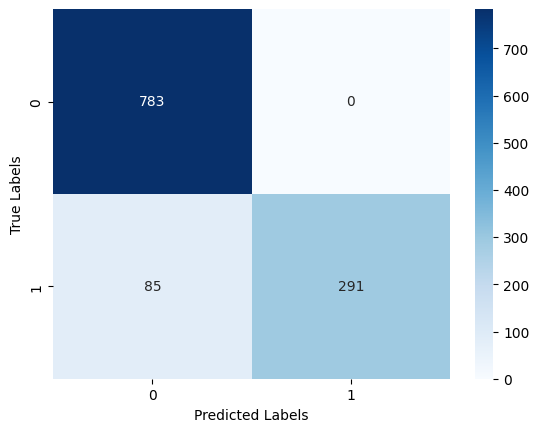

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/Really akharin report/CM_multinomialNB.jpg', dpi=300, bbox_inches='tight')


In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


random.seed(1234)

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('clf', MultinomialNB())
])

# Define parameter range for grid search
parameters = {'clf__alpha': [0.0, 0.5, 1.0]} ## must be mentioned you have checked values around the default

# Grid search across our parameters, scoring by accuracy
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, Y_train)

# Best parameter set
print('Best parameters found:\n', grid_search.best_params_)

# All results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predict using best parameters on test set
y_pred_opt = grid_search.predict(X_valid_tfidf)

# Evaluate model
print(classification_report(Y_val, y_pred_opt))
print("Accuracy: ", accuracy_score(Y_val, y_pred_opt))
print(grid_search.best_params_)

Best parameters found:
 {'clf__alpha': 0.0}
0.980 (+/-0.008) for {'clf__alpha': 0.0}
0.951 (+/-0.009) for {'clf__alpha': 0.5}
0.914 (+/-0.018) for {'clf__alpha': 1.0}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       783
           1       1.00      0.93      0.96       376

    accuracy                           0.98      1159
   macro avg       0.98      0.97      0.97      1159
weighted avg       0.98      0.98      0.98      1159

Accuracy:  0.9775668679896462
{'clf__alpha': 0.0}


In [44]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[783   0]
 [ 85 291]]


# 4.3 RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
# Model training
random.seed(1234)

model = RandomForestClassifier( random_state=42)
model.fit(X_train_tfidf, Y_train)

# Model evaluation
Y_pred = model.predict(X_valid_tfidf)
Y_pred_tr = model.predict(X_train_tfidf)
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Precision:", precision_score(Y_val, Y_pred))
print("Recall:", recall_score(Y_val, Y_pred))
print("F1 score:", f1_score(Y_val, Y_pred))

train Accuracy: 1.0
Accuracy: 0.9827437446074202
Precision: 0.9972067039106145
Recall: 0.949468085106383
F1 score: 0.9727520435967303


In [63]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[782   1]
 [ 19 357]]


Text(50.722222222222214, 0.5, 'True Labels')

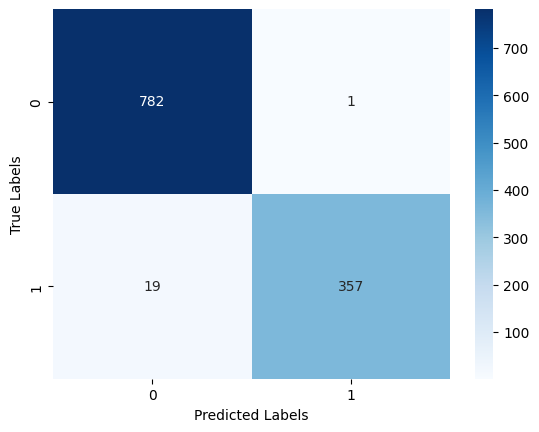

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_RandomForestClassifier.jpg', dpi=300, bbox_inches='tight')


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd



# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

# Define parameter range for grid search
parameters = {
    'clf__n_estimators': [10, 50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30]
}

# Grid search across our parameters, scoring by accuracy
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, Y_train)

# Best parameter set
print('Best parameters found:\n', grid_search.best_params_)

# All results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predict using best parameters on test set
y_pred_opt = grid_search.predict(X_valid_tfidf)

# Evaluate model
print(classification_report(Y_val, y_pred_opt))
print("Accuracy: ", accuracy_score(Y_val, y_pred_opt))
print(grid_search.best_params_)

Best parameters found:
 {'clf__max_depth': None, 'clf__n_estimators': 200}
0.977 (+/-0.014) for {'clf__max_depth': None, 'clf__n_estimators': 10}
0.988 (+/-0.009) for {'clf__max_depth': None, 'clf__n_estimators': 50}
0.988 (+/-0.010) for {'clf__max_depth': None, 'clf__n_estimators': 100}
0.989 (+/-0.011) for {'clf__max_depth': None, 'clf__n_estimators': 200}
0.940 (+/-0.020) for {'clf__max_depth': 10, 'clf__n_estimators': 10}
0.953 (+/-0.020) for {'clf__max_depth': 10, 'clf__n_estimators': 50}
0.955 (+/-0.015) for {'clf__max_depth': 10, 'clf__n_estimators': 100}
0.953 (+/-0.013) for {'clf__max_depth': 10, 'clf__n_estimators': 200}
0.968 (+/-0.020) for {'clf__max_depth': 20, 'clf__n_estimators': 10}
0.981 (+/-0.007) for {'clf__max_depth': 20, 'clf__n_estimators': 50}
0.980 (+/-0.010) for {'clf__max_depth': 20, 'clf__n_estimators': 100}
0.980 (+/-0.016) for {'clf__max_depth': 20, 'clf__n_estimators': 200}
0.978 (+/-0.012) for {'clf__max_depth': 30, 'clf__n_estimators': 10}
0.986 (+/-0.01

In [66]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, y_pred_opt)

# print the confusion matrix
print(cm)


[[782   1]
 [ 17 359]]


In [67]:
print("train Accuracy:", accuracy_score(Y_train, Y_pred_tr))
print("Accuracy:", accuracy_score(Y_val, y_pred_opt))
print("Precision:", precision_score(Y_val, y_pred_opt))
print("Recall:", recall_score(Y_val, y_pred_opt))
print("F1 score:", f1_score(Y_val, y_pred_opt))

train Accuracy: 1.0
Accuracy: 0.9844693701466781
Precision: 0.9972222222222222
Recall: 0.9547872340425532
F1 score: 0.9755434782608695


# 4.XGBoost

In [88]:
import pandas as pd#random_state=42
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train_tfidf, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_valid_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_val, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9887834339948232


In [89]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[782   1]
 [ 19 357]]


In [90]:
param_grid = {
    'learning_rate': [0.01, 0.1,0.2]
}


In [91]:
from sklearn.model_selection import GridSearchCV

xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss",,random_state=42)  # or XGBRegressor, depending on your task

grid_search = GridSearchCV(estimator=xgboost_model, 
                           param_grid=param_grid, 
                           cv=3,  # number of folds in cross-validation 
                           n_jobs=-1,  # number of jobs to run in parallel, -1 means using all processors
                           verbose=2)  # Controls the verbosity: the higher, the more messages
grid_search.fit(X_train_tfidf, Y_train)
grid_search.best_params_


SyntaxError: ignored

In [94]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define a pipeline combining a text feature extractor with a simple classifier
pipeline = Pipeline([
    ('clf', XGBClassifier())
])

# Define parameter range for grid search
parameters = {
    'clf__learning_rate': [0.01, 0.1,0.2]  # 'clf' is the name you've given to the XGBClassifier step in your pipeline
}

# Grid search across our parameters, scoring by accuracy
grid_search = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, Y_train)

# Best parameter set
print('Best parameters found:\n', grid_search.best_params_)

# All results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Predict using best parameters on test set
y_pred = grid_search.predict(X_valid_tfidf)

# Evaluate model
print(classification_report(Y_val, y_pred))
print("Accuracy: ", accuracy_score(Y_val, y_pred))
print(grid_search.best_params_)


Best parameters found:
 {'clf__learning_rate': 0.1}
0.971 (+/-0.020) for {'clf__learning_rate': 0.01}
0.992 (+/-0.009) for {'clf__learning_rate': 0.1}
0.992 (+/-0.009) for {'clf__learning_rate': 0.2}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       783
           1       1.00      0.97      0.98       376

    accuracy                           0.99      1159
   macro avg       0.99      0.98      0.99      1159
weighted avg       0.99      0.99      0.99      1159

Accuracy:  0.9879206212251941
{'clf__learning_rate': 0.1}


In [95]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(Y_val, Y_pred)

# print the confusion matrix
print(cm)


[[782   1]
 [ 19 357]]


# 4.5.BERT

In [17]:
#import locale

#locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
#!pip uninstall -y transformers
#!pip install transformers
#import os
#os.environ["PYTHONIOENCODING"] = "UTF-8"
#!export LC_ALL=C.UTF-8
#!export LANG=C.UTF-8

#! pip install transformers
!pip install transformers #restart the run time
!pip uninstall -y tensorflow keras
!pip install tensorflow keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.8 MB/s eta 0:00:00
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.5 MB/s eta 0:00:00


In [96]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [100]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Load data
#df = pd.read_csv('spam_assassin.csv')  # replace with your actual data
#df=email
# Split data
#train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2)

# Load pretrained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Encode texts
train_encodings = tokenizer(list(X_train_join), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_valid_join), truncation=True, padding=True, max_length=128)

# Convert inputs to PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_labels = torch.tensor(list(Y_train))
train_masks = torch.tensor(train_encodings['attention_mask'])

test_inputs = torch.tensor(test_encodings['input_ids'])
test_labels = torch.tensor(list(Y_val))
test_masks = torch.tensor(test_encodings['attention_mask'])

# Create dataloaders
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs=5
# Training loop
for epoch in range(epochs):
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch
        b_input_ids = b_input_ids.to(device)
        b_input_mask = b_input_mask.to(device)
        b_labels = b_labels.to(device)

        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Epoch: {epoch}, Training loss: {avg_train_loss}")
    
# Evaluation
model.eval()
total_eval_accuracy = 0
for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = batch
    b_input_ids = b_input_ids.to(device)
    b_input_mask = b_input_mask.to(device)
    b_labels = b_labels.to(device)

    with torch.no_grad():        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    total_eval_accuracy += flat_accuracy(logits, label_ids)

avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
print(f"Accuracy: {avg_val_accuracy}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch: 0, Training loss: 0.3331955715740493
Epoch: 1, Training loss: 0.10448850305118693


KeyboardInterrupt: ignored

In [18]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Load data
#df = pd.read_csv('spam_assassin.csv')  # replace with your actual data
#df=email
# Split data
#train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2)

# Load pretrained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Encode texts
train_encodings = tokenizer(list(X_train_join), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_valid_join), truncation=True, padding=True, max_length=128)

# Convert inputs to PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_labels = torch.tensor(list(Y_train))
train_masks = torch.tensor(train_encodings['attention_mask'])

test_inputs = torch.tensor(test_encodings['input_ids'])
test_labels = torch.tensor(list(Y_val))
test_masks = torch.tensor(test_encodings['attention_mask'])

# Create dataloaders
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs=5
# Training loop
for epoch in range(epochs):
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch
        b_input_ids = b_input_ids.to(device)
        b_input_mask = b_input_mask.to(device)
        b_labels = b_labels.to(device)

        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Epoch: {epoch}, Training loss: {avg_train_loss}")
    
from sklearn.metrics import confusion_matrix

# Before your evaluation loop, create empty lists to store results
true_labels = []
pred_labels = []

# Evaluation
model.eval()
total_eval_accuracy = 0
for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = batch
    b_input_ids = b_input_ids.to(device)
    b_input_mask = b_input_mask.to(device)
    b_labels = b_labels.to(device)

    with torch.no_grad():        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # get the index of the max log-probability which is the predicted class
    pred_label = np.argmax(logits, axis=1)
    
    # Add the labels to the lists
    true_labels.extend(label_ids)
    pred_labels.extend(pred_label)
    
    total_eval_accuracy += flat_accuracy(logits, label_ids)

avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
print(f"Accuracy: {avg_val_accuracy}")

# After your loop, compute and print the confusion matrix:
cm = confusion_matrix(true_labels, pred_labels)
print(f"Confusion Matrix: \n{cm}")



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

KeyboardInterrupt: ignored

In [102]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Load data
#df = pd.read_csv('spam_assassin.csv')  # replace with your actual data
#df=email
# Split data
#train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2)

# Load pretrained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Encode texts
train_encodings = tokenizer(list(X_train_join), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_valid_join), truncation=True, padding=True, max_length=128)

# Convert inputs to PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_labels = torch.tensor(list(Y_train))
train_masks = torch.tensor(train_encodings['attention_mask'])

test_inputs = torch.tensor(test_encodings['input_ids'])
test_labels = torch.tensor(list(Y_val))
test_masks = torch.tensor(test_encodings['attention_mask'])

# Create dataloaders
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)
epochs=2
# Training loop
for epoch in range(epochs):
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = batch
        b_input_ids = b_input_ids.to(device)
        b_input_mask = b_input_mask.to(device)
        b_labels = b_labels.to(device)

        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Epoch: {epoch}, Training loss: {avg_train_loss}")
    
from sklearn.metrics import confusion_matrix

# Before your evaluation loop, create empty lists to store results
true_labels = []
pred_labels = []

# Evaluation
model.eval()
total_eval_accuracy = 0
for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = batch
    b_input_ids = b_input_ids.to(device)
    b_input_mask = b_input_mask.to(device)
    b_labels = b_labels.to(device)

    with torch.no_grad():        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # get the index of the max log-probability which is the predicted class
    pred_label = np.argmax(logits, axis=1)
    
    # Add the labels to the lists
    true_labels.extend(label_ids)
    pred_labels.extend(pred_label)
    
    total_eval_accuracy += flat_accuracy(logits, label_ids)

avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
print(f"Accuracy: {avg_val_accuracy}")

# After your loop, compute and print the confusion matrix:
cm = confusion_matrix(true_labels, pred_labels)
print(f"Confusion Matrix: \n{cm}")



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch: 0, Training loss: 0.3139510992743553
Epoch: 1, Training loss: 0.09955352492664658
Accuracy: 0.9724903474903475
Confusion Matrix: 
[[777   6]
 [ 23 353]]


Text(50.722222222222214, 0.5, 'True Labels')

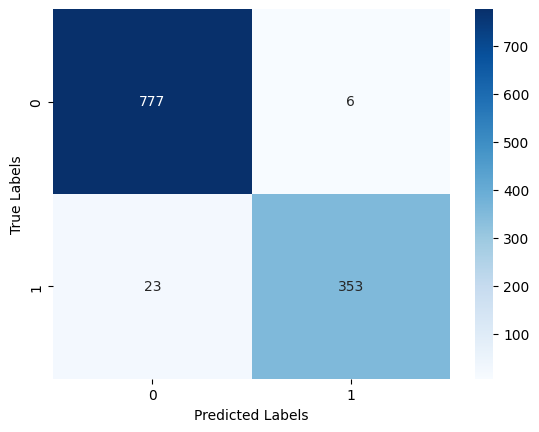

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_RandomForestClassifier.jpg', dpi=300, bbox_inches='tight')


Best model

In [19]:
X_trva=pd.concat([X_train, X_val], axis=0)
print(X_trva.shape)
Y_trva=pd.concat([Y_train, Y_val], axis=0)
print(Y_trva.shape)

(4636,)
(4636,)


In [20]:
X_trva_token = X_trva.apply(preprocess_text)
X_trva_join = X_trva_token.apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()
X_trva_tfidf = vectorizer.fit_transform(X_trva_join)

X_test_token = X_test.apply(preprocess_text)
X_test_join = X_test_token.apply(lambda x: ' '.join(x))
X_test_tfidf = vectorizer.transform(X_test_join)



In [29]:
# Model training
random.seed(1234)
model = SVC(kernel="linear",random_state=42, C=10)
model.fit(X_trva_tfidf, Y_trva)

# Model evaluation
Y_pred_trva_optimal = model.predict(X_trva_tfidf)

# Model evaluation
Y_pred_test = model.predict(X_test_tfidf)
print("train Accuracy:", accuracy_score(Y_trva, Y_pred_trva_optimal))
print("valid Accuracy:", accuracy_score(Y_test, Y_pred_test))
print("Accuracy:", accuracy_score(Y_test, Y_pred_test))
print("Precision:", precision_score(Y_test, Y_pred_test))
print("Recall:", recall_score(Y_test, Y_pred_test))
print("F1 score:", f1_score(Y_test, Y_pred_test))

train Accuracy: 1.0
valid Accuracy: 0.9956896551724138
Accuracy: 0.9956896551724138
Precision: 0.9919137466307277
Recall: 0.9945945945945946
F1 score: 0.9932523616734144


In [30]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred_test)

# print the confusion matrix
print(cm)

[[787   3]
 [  2 368]]


Text(50.722222222222214, 0.5, 'True Labels')

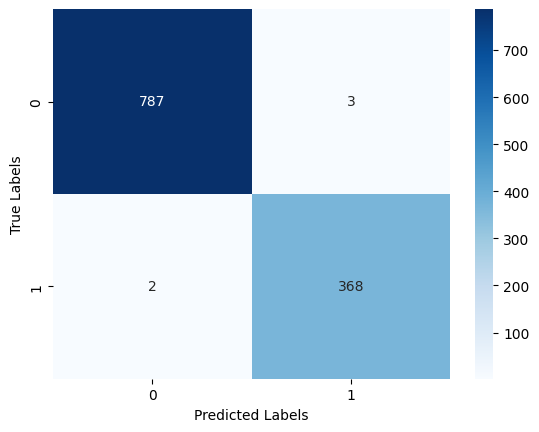

In [31]:

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#plt.show()
#plt.savefig('M:/LIU/TM/project/Final Work/akharin report/CM_RandomForestClassifier.jpg', dpi=300, bbox_inches='tight')


In [45]:

# Round predictions to the nearest integer (0 or 1) to get the predicted labels
#predicted_labels = np.round(Y_pred).astype(int)

# Identify the instances where the model's prediction was incorrect
#incorrect = X_test_join[Y_pred_test != np.array(Y_test)]
#incorrect = X_test_join[Y_pred_test != np.array(Y_test)]
incorrect = X_test_join[(Y_pred_test != Y_test) & (Y_test == 1)]

# Now you can examine the `incorrect` DataFrame to see the instances where the model was incorrect
print(incorrect)

5168                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   FROM TUE AUG YYYY RECEIVED FROM LOCALHOST LOCALHOST BY POSTFIX WITH ESMTP ID FOR JM LOCALHOST TUE AUG EDT RECEIVED FROM PHOBOS BY LOCALHOST WITH IMAP FOR JM LOCALHOST TUE AUG IST RECEIVED FROM BY WITH ESMTP ID FOR JM MON AUG RECEIVED FROM LOCALHOST BY POSTFIX WITH ESMTP ID SUN AUG PDT FORK RECEIVED FROM BY POSTFIX WITH ESMTP ID FOR FORK SUN AUG PDT RE

In [46]:
pd.set_option('display.max_colwidth', None)
incorrect

5168                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   FROM TUE AUG YYYY RECEIVED FROM LOCALHOST LOCALHOST BY POSTFIX WITH ESMTP ID FOR JM LOCALHOST TUE AUG EDT RECEIVED FROM PHOBOS BY LOCALHOST WITH IMAP FOR JM LOCALHOST TUE AUG IST RECEIVED FROM BY WITH ESMTP ID FOR JM MON AUG RECEIVED FROM LOCALHOST BY POSTFIX WITH ESMTP ID SUN AUG PDT FORK RECEIVED FROM BY POSTFIX WITH ESMTP ID FOR FORK SUN AUG PDT RE

In [38]:

pd.reset_option('display.max_colwidth')

## Refrence:
https://www.malicksarr.com/

https://www.geeksforgeeks.org/

https://scikit-learn.org/

https://www.statology.org/

https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704